In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek

# Loading Dataset

In [3]:
df = pd.read_csv("/content/heart-attack-risk-prediction-dataset.csv")

display(df.head())

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Heart Attack Risk (Text),Gender,Systolic blood pressure,Diastolic blood pressure
0,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,0,...,0.0,0.333333,0.0,0.227018,0.048229,0.036512,0,Male,0.600000,0.534884
1,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,1,...,2.0,0.666667,0.0,0.227018,0.048229,0.036512,0,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,2,...,4.0,1.000000,0.0,0.227018,0.048229,0.036512,0,Male,0.187097,0.674419
3,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,2,...,1.0,0.500000,0.0,0.227018,0.048229,0.036512,0,Male,0.645161,0.593023
4,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,2,...,1.0,0.166667,0.0,0.227018,0.048229,0.036512,0,Male,0.251613,0.383721


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              9651 non-null   float64
 1   Cholesterol                      9651 non-null   float64
 2   Heart rate                       9651 non-null   float64
 3   Diabetes                         9377 non-null   float64
 4   Family History                   9377 non-null   float64
 5   Smoking                          9377 non-null   float64
 6   Obesity                          9377 non-null   float64
 7   Alcohol Consumption              9377 non-null   float64
 8   Exercise Hours Per Week          9651 non-null   float64
 9   Diet                             9651 non-null   int64  
 10  Previous Heart Problems          9377 non-null   float64
 11  Medication Use                   9377 non-null   float64
 12  Stress Level        

None

In [5]:
display(df.describe())

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Heart Attack Risk (Text),Systolic blood pressure,Diastolic blood pressure
count,9651.000000,9651.000000,9651.000000,9377.000000,9377.000000,9377.000000,9377.000000,9377.000000,9651.000000,9651.000000,...,9651.000000,9377.000000,9651.000000,9651.000000,9651.000000,9651.000000,9651.000000,9651.000000,9651.000000,9651.000000
mean,0.450254,0.499780,0.050756,0.652554,0.488749,0.902421,0.500160,0.600192,0.502110,1.057093,...,0.503603,3.501866,0.504621,0.345146,0.227018,0.048229,0.036512,0.398093,0.449982,0.497553
std,0.231154,0.284461,0.024922,0.476184,0.499900,0.296761,0.500027,0.489885,0.284830,0.868418,...,0.286183,2.283833,0.327482,0.475440,0.075577,0.075959,0.059556,0.737488,0.170344,0.172033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.258427,0.264286,0.035289,0.000000,0.000000,1.000000,0.000000,0.000000,0.259793,0.000000,...,0.262338,2.000000,0.166667,0.000000,0.227018,0.048229,0.036512,0.000000,0.303226,0.348837
50%,0.460674,0.499780,0.050412,1.000000,0.000000,1.000000,1.000000,1.000000,0.502110,1.000000,...,0.503603,3.000000,0.500000,0.000000,0.227018,0.048229,0.036512,0.000000,0.445161,0.500000
75%,0.640449,0.739286,0.065995,1.000000,1.000000,1.000000,1.000000,1.000000,0.747086,2.000000,...,0.748052,6.000000,0.833333,1.000000,0.227018,0.048229,0.036512,0.000000,0.600000,0.651163
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


# Handling missing values

In [6]:
df = df.copy()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna(df[column].mode()[0])
    else:
        df[column] = df[column].fillna(df[column].median())

# Conversion

In [7]:
df = pd.get_dummies(df, drop_first=True)

# Correlation Heatmap

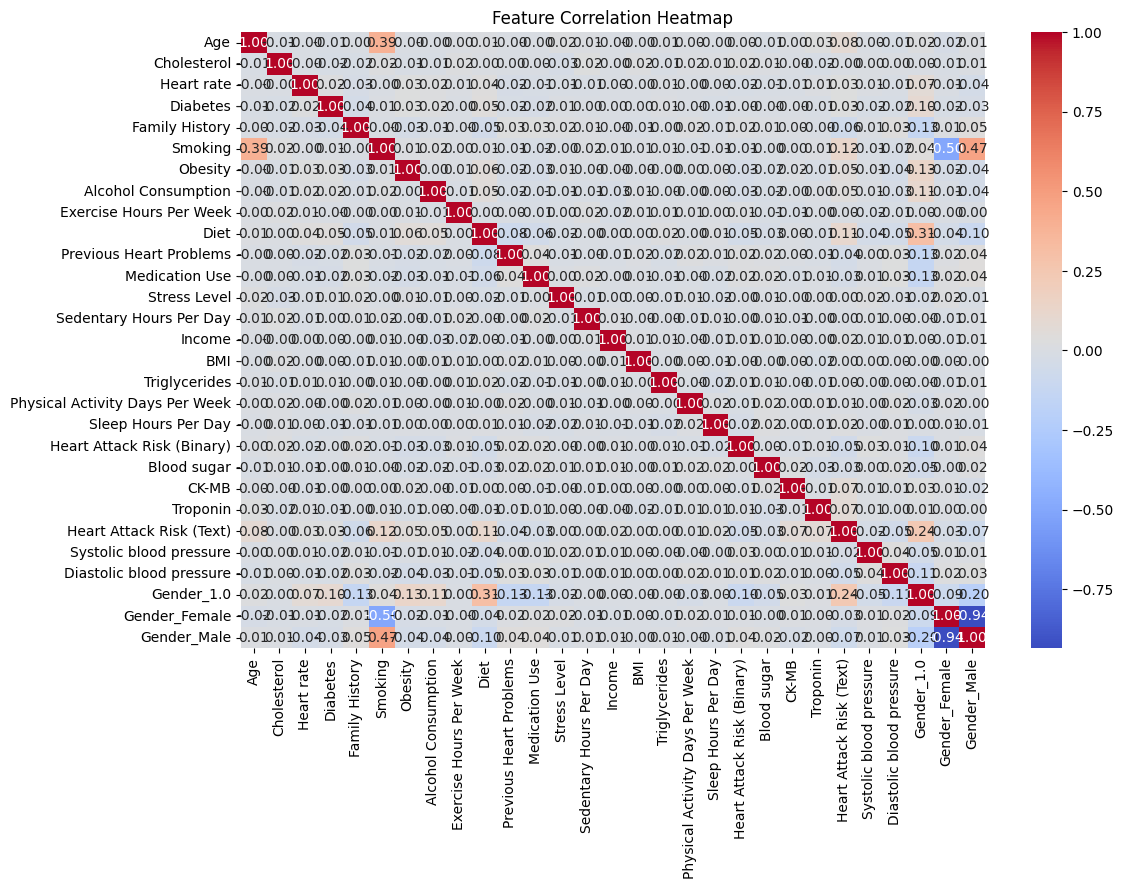

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Verify target column name

In [9]:
print("Dataset Columns:", df.columns.tolist())

Dataset Columns: ['Age', 'Cholesterol', 'Heart rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk (Binary)', 'Blood sugar', 'CK-MB', 'Troponin', 'Heart Attack Risk (Text)', 'Systolic blood pressure', 'Diastolic blood pressure', 'Gender_1.0', 'Gender_Female', 'Gender_Male']


In [10]:
target_column = "Heart Attack Risk (Binary)"
if target_column not in df.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Please check column names.")

# Feature selection & Splitting Data

In [11]:
X = df.drop(columns=[target_column, "Heart Attack Risk (Text)"])
y = df[target_column]


smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42, stratify=y_resampled)

# Feature Scaling

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model using XGBoost

In [13]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:56:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Model Evaluation - XGBoost

In [14]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


XGBoost Model Accuracy: 0.7289

Classification Report (XGBoost):
               precision    recall  f1-score   support

         0.0       0.70      0.80      0.75      1210
         1.0       0.77      0.66      0.71      1210

    accuracy                           0.73      2420
   macro avg       0.73      0.73      0.73      2420
weighted avg       0.73      0.73      0.73      2420



# Confusion Matrix - XGBoost

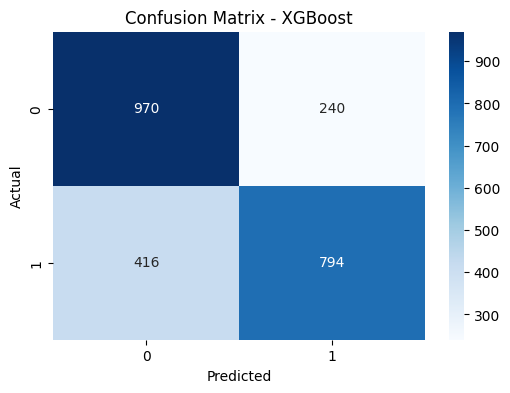

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Train Model using Random Forest

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation - Random Forest

In [17]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.7632

Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.72      0.86      0.78      1210
         1.0       0.82      0.67      0.74      1210

    accuracy                           0.76      2420
   macro avg       0.77      0.76      0.76      2420
weighted avg       0.77      0.76      0.76      2420



# Confusion Matrix - Random Forest

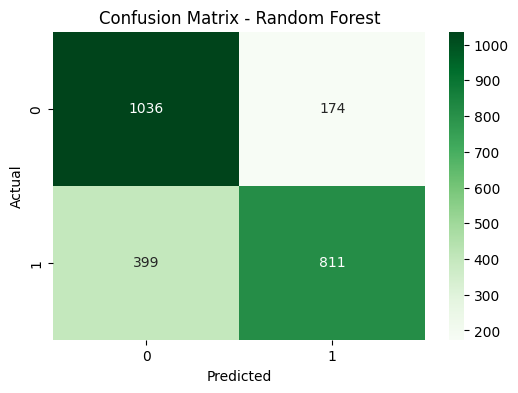

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()